In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from SARSA.agent import RandomAgent, SARSAAgent, DeepAgent
from SARSA.game import Game
from SARSA.maze import Maze, MazeWithGhosts
from SARSA.vizualiser import plot_cumsum, plot_maze, plot_rollav


# No ghosts

## Maze gen

In [3]:
maze = Maze((10, 10), 3)

## Visualization

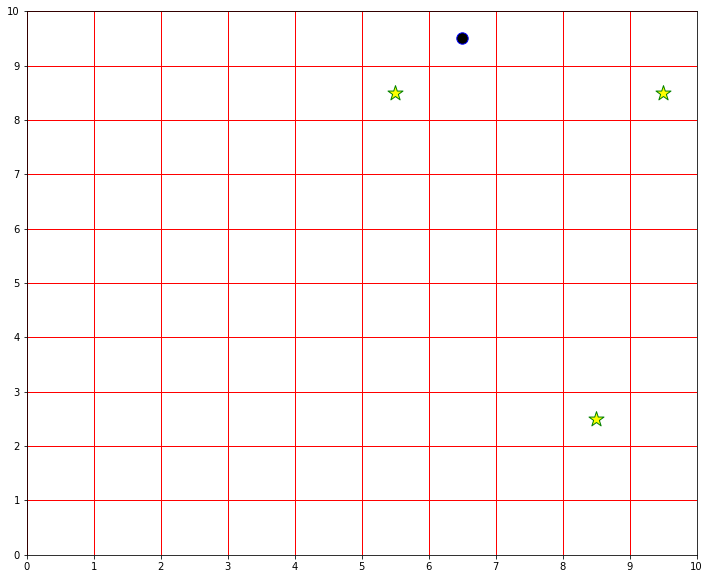

In [4]:
plot_maze(maze)

## Random Agent

In [9]:
game = Game(maze, RandomAgent(maze), max_steps=20)

In [ ]:
game.run_game(plot=True)

In [11]:
game = Game(maze, RandomAgent(maze), max_steps=20)
game.train_agent(episodes=1000)

episodes: 100%|██████████| 1000/1000 [00:00<00:00, 1465.94it/s]


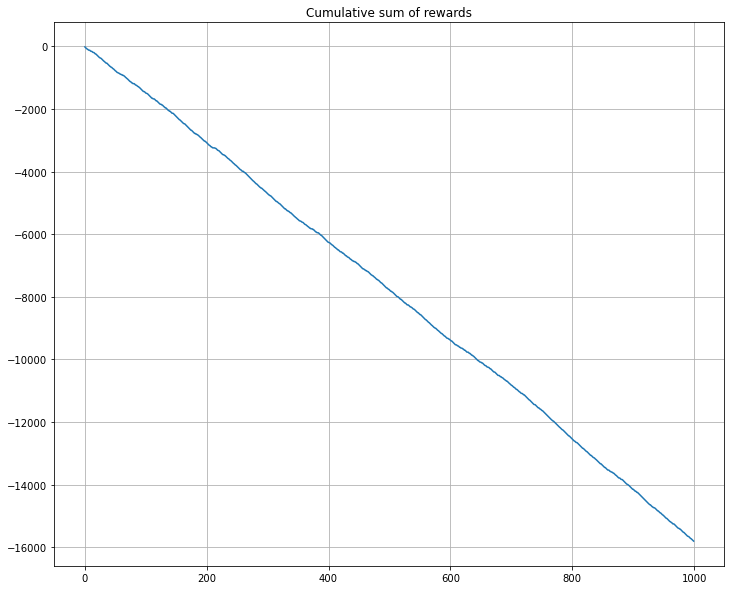

In [12]:
plot_cumsum(game)

## SARSA agent

In [13]:
sarsaaagent = SARSAAgent(maze)

### Train

In [16]:
game = Game(maze, sarsaaagent, max_steps=20)
game.train_agent(episodes=1000)

episodes: 100%|██████████| 1000/1000 [00:01<00:00, 568.57it/s]


### Vizualization

#### Cumulative rewards

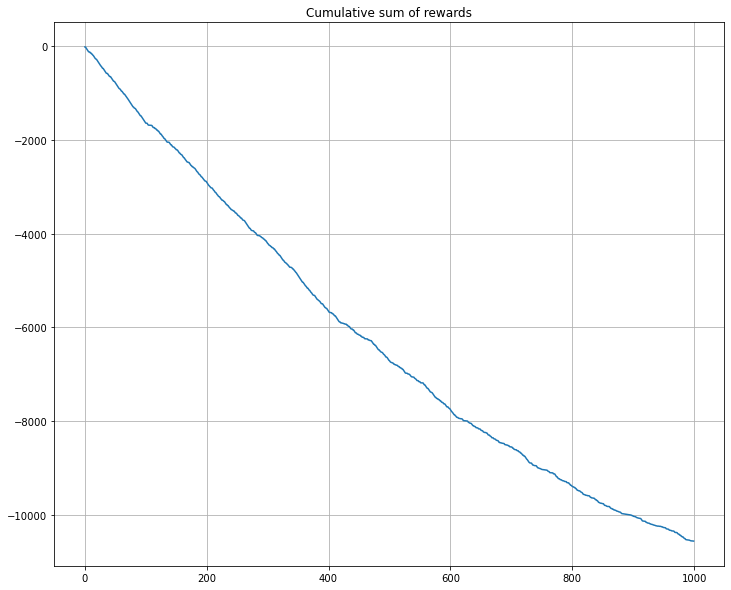

In [17]:
plot_cumsum(game)

#### Rolling average

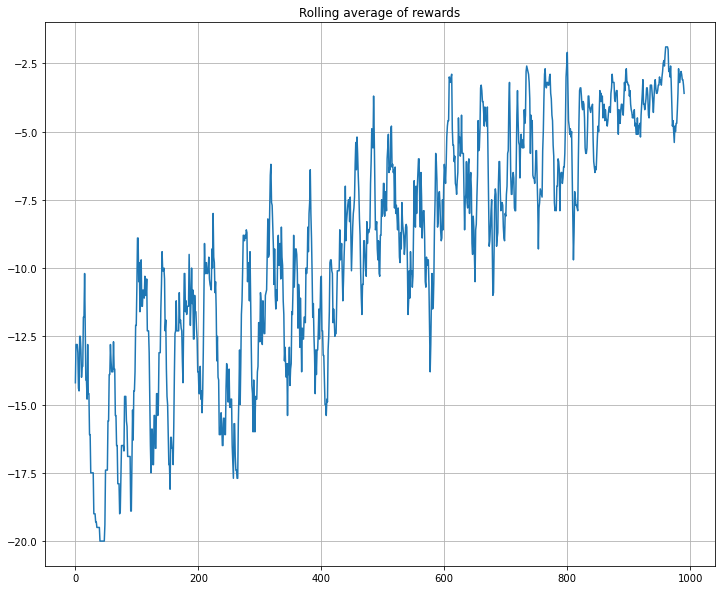

In [12]:
plot_rollav(game, w=10)

#### Sample run

In [ ]:
game.run_game(plot=True)

 # Ghosts

## Maze gen

In [34]:
maze = MazeWithGhosts((10, 10), 3, 10)

## Visualization

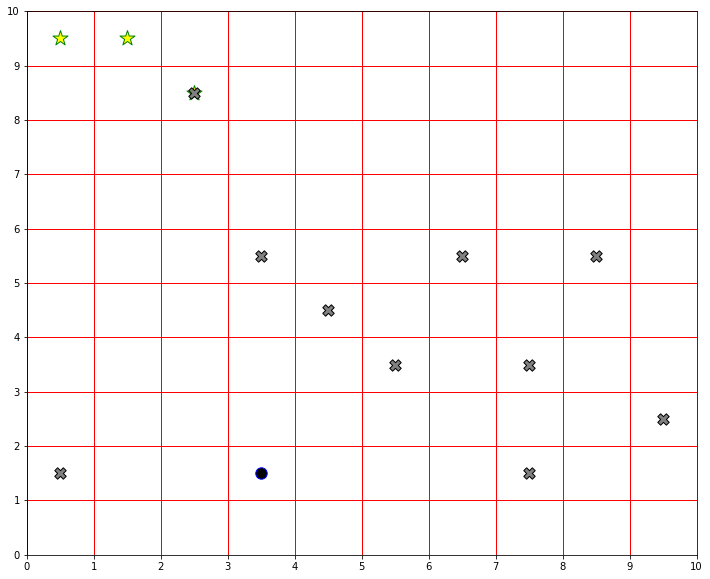

In [35]:
plot_maze(maze)

## SARSA agent

In [36]:
sarsaaagent = SARSAAgent(maze)

### Train

In [37]:
game = Game(maze, sarsaaagent, max_steps=20)
game.train_agent(episodes=1000)

episodes: 100%|██████████| 1000/1000 [00:08<00:00, 122.91it/s]


### Vizualization

#### Cumulative rewards

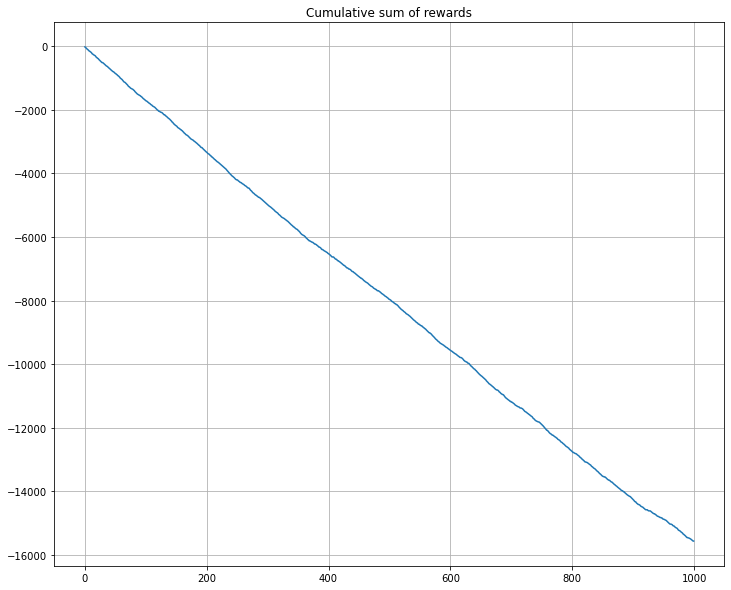

In [38]:
plot_cumsum(game)

#### Rolling average

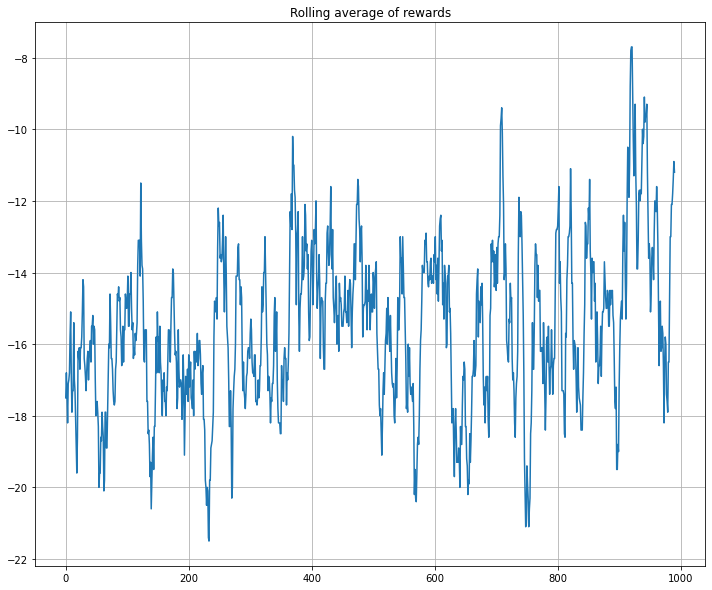

In [39]:
plot_rollav(game, w=10)

In [ ]:
game.run_game(plot=True)

### Ghosts dependency

episodes: 100%|██████████| 2000/2000 [00:12<00:00, 163.36it/s]


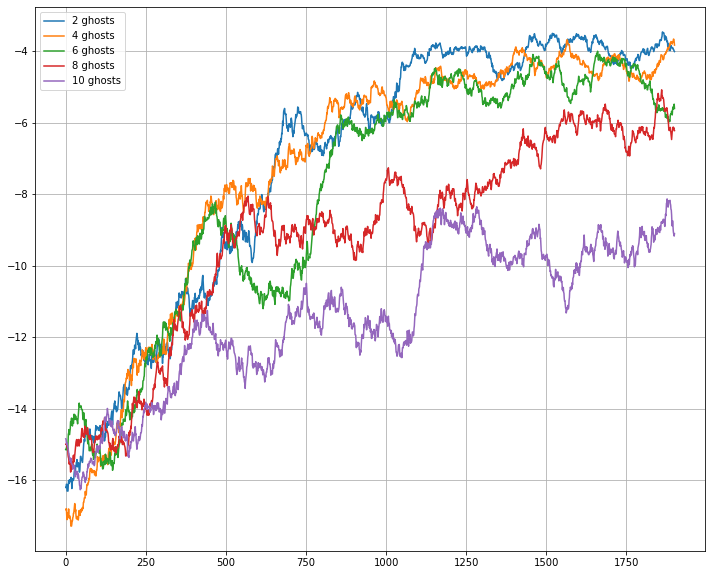

In [42]:
plt.figure(1, figsize=(12, 10))
w = 100
for nb_ghosts in range(2,11,2):
    maze = MazeWithGhosts((10, 10), 3, nb_ghosts)
    sarsaaagent = SARSAAgent(maze)
    game = GameWithGhosts(maze, sarsaaagent, max_steps=20)
    game.train_agent(episodes=2000)
    plt.plot(np.convolve(game.rewards, np.ones(w), "valid") / w, label=f"{nb_ghosts} ghosts")

# plt.legend([f"{nb_ghosts} ghosts" for nb_ghosts in range(1,11)])
plt.legend()
plt.grid()
plt.show()

## Deep Q Agent

In [31]:
maze = MazeWithGhosts((10, 10), 3, 10)

In [32]:
deepagent = DeepAgent(maze)

In [33]:
maze.get_state()

[8, 1, 3, 5, 2, 2, 5, 6, 2, 4, 8, 2, 9, 4, 7, 1, 8, 0, 8, 4, 8, 1]

In [38]:
game = Game(maze, deepagent, max_steps=20)
game.train_agent(episodes=100)

episodes:   0%|          | 0/100 [00:00<?, ?it/s]

episodes:   0%|          | 0/100 [00:00<?, ?it/s]


ValueError: in user code:

    File "/home/sylvanbrocard/Documents/SARSA/.micromamba/envs/default/lib/python3.10/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/home/sylvanbrocard/Documents/SARSA/.micromamba/envs/default/lib/python3.10/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sylvanbrocard/Documents/SARSA/.micromamba/envs/default/lib/python3.10/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/home/sylvanbrocard/Documents/SARSA/.micromamba/envs/default/lib/python3.10/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/home/sylvanbrocard/Documents/SARSA/.micromamba/envs/default/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/sylvanbrocard/Documents/SARSA/.micromamba/envs/default/lib/python3.10/site-packages/keras/engine/input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_8" (type Sequential).
    
    Input 0 of layer "dense_24" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None
